### Flight Fare Prediction(EDA + Feature Engineering)

**Problem statement:**
* This dataset comprises of Flight Price taken from Kaggle
* A user can predict the price of the Flight Fare based on input features.
* Prediction results can be useful for traveller to get suggested price

**Importing essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [2]:
df_train = pd.read_excel('Data_train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Exploring the Dataset**

In [4]:
print(df_train.shape), print(df_test.shape)

(10683, 11)
(2671, 10)


(None, None)

- train_set: 10683 records with 11 features.
- test_set: 2671 records with 10 features.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df_train.describe() #gives statsitical summary for numerical features.

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
# define numerical & categorical columns
numeric_features=[feature for feature in df_train.columns if df_train[feature].dtype != 'O']
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)}numerical features {numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')

We have 1numerical features ['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


### Feature Information
* **Airline:** Name of the Airline from which the Ticket is Booked.
* **Date_of_Journey:** Date of Journey of the Traveller.
* **Source:** Source from which the Airline Would Departure.
* **Destination:** Destination to Which Airline Would Arrive.
* **Route:** Route of the Airline from Source to Destination.
* **Dep_Time:** Time at which Flight Would Departure from the Source.
* **Arrival_Time:** Time at which Flight Would Arrive at the Destination.
* **Duration:** Duration that Airline Takes to fly from Source to Destination.
* **Total_Stops:** Total No of Stops that Airline takes Between Source and Destination.
* **Additional_Info:** Any Additional Info about the Airline.
* **Price:** Fare of the Ticket to fly from Source to Destination.

In [9]:
df_train.isnull().sum() #checking for missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**There are 1 null value for Feature Route and 1 for Total_Stops**
- so lets just drop the row which contains null values

In [10]:
df_train.dropna(inplace=True)

In [11]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

**There are no missing values in test_dataset**

### Data Visualization

In [13]:
df_train['Airline'].value_counts(normalize=True)*100

Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64

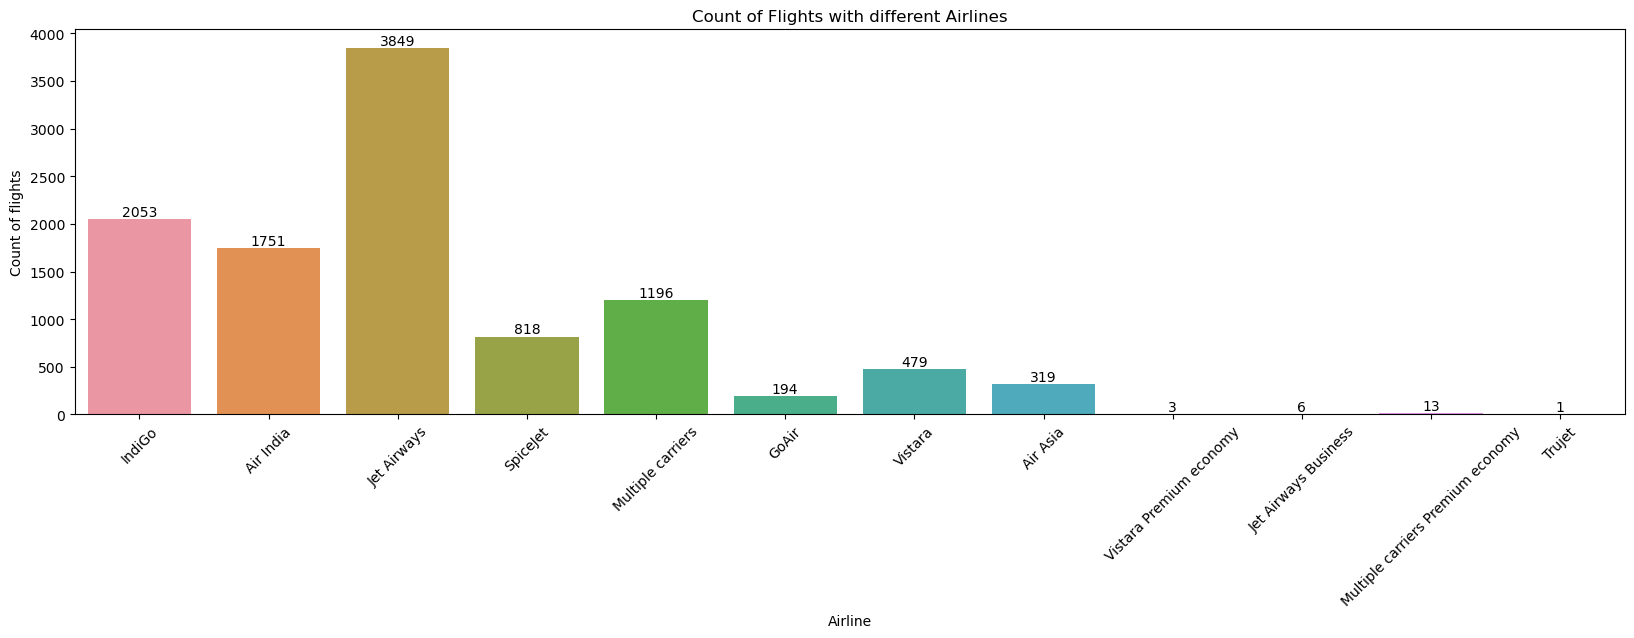

In [14]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = df_train['Airline'], data =df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.title('Count of Flights with different Airlines')
plt.xticks(rotation = 45)
for label in ax.containers:
    ax.bar_label(label)

plt.show()

In [15]:
df_train['Total_Stops'].value_counts(normalize=True)*100

1 stop      52.658678
non-stop    32.681146
2 stops     14.229545
3 stops      0.421269
4 stops      0.009362
Name: Total_Stops, dtype: float64

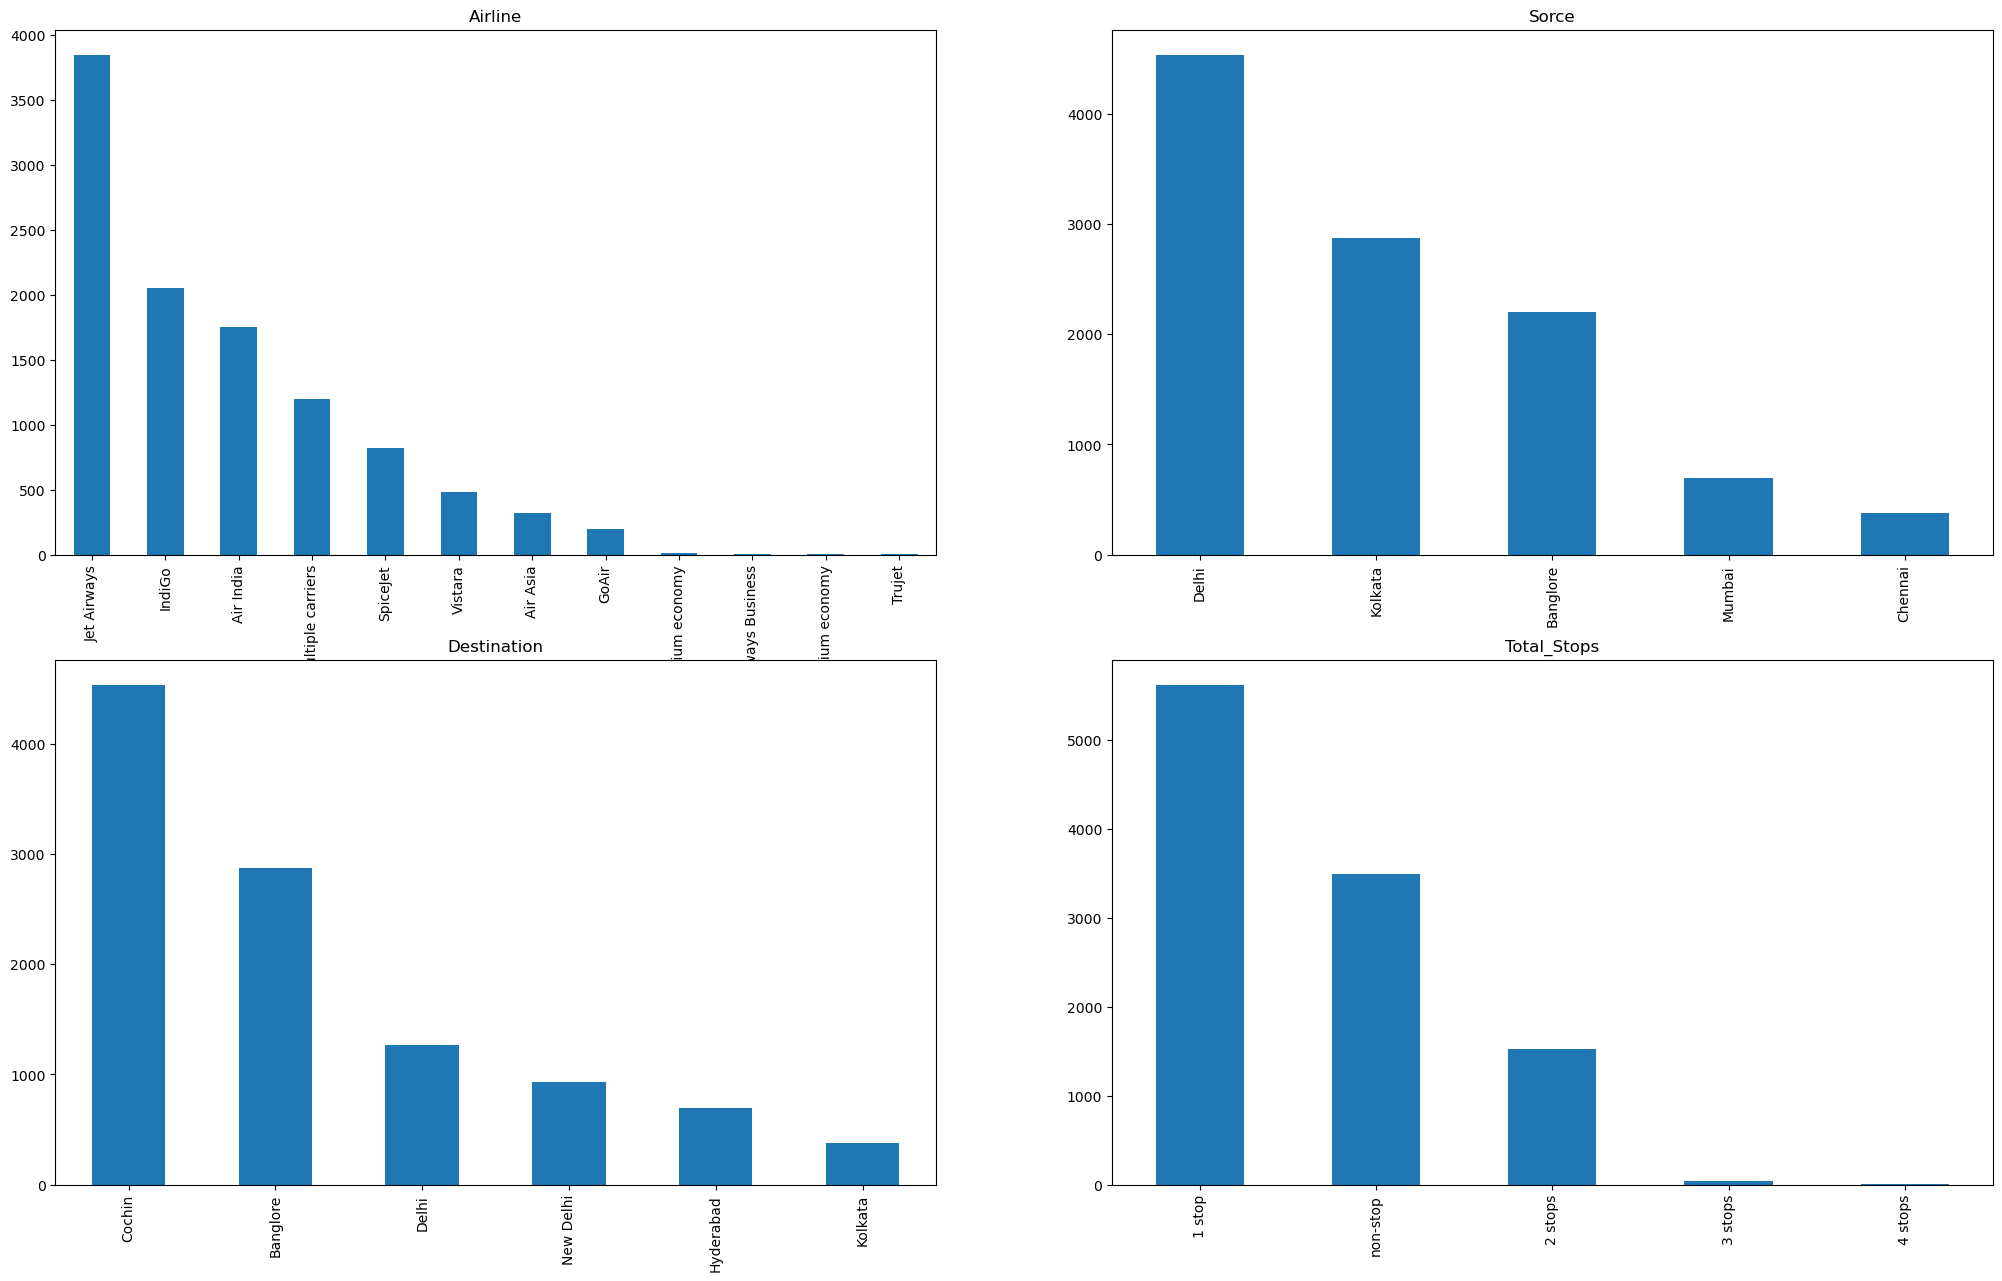

In [16]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
df_train['Airline'].value_counts().plot(kind='bar')
plt.title('Airline')

plt.subplot(2,2,2)
df_train['Source'].value_counts().plot(kind='bar')
plt.title('Sorce')

plt.subplot(2,2,3)
df_train['Destination'].value_counts().plot(kind='bar')
plt.title('Destination')

plt.subplot(2,2,4)
df_train['Total_Stops'].value_counts().plot(kind='bar')
plt.title('Total_Stops')

plt.show()

* Jet Airways most preferred airline has customer footfall about 36% followed by Indigo(19%) and Air India(16%).
* Delhi has the highest footfall for source and Cochin has the highest footfall for Destination .
* About 52% Airlines have 1 Stops and 32% Airlines have no Stops b/w Sorce and Destination.

In [17]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [18]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

- As we can see that, there is 2 Destination  as Delhi and New Delhi so lets merge it as Delhi only.

In [19]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
df_train['Destination'] = df_train['Destination'].apply(newd)

In [20]:
def newd(x):
    if x=='new Delhi':
        return 'Delhi'
    else:
        return x
df_test['Destination'] = df_test['Destination'].apply(newd)

In [21]:
df_train.groupby(['Airline','Source','Destination']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Total_Flights'})[:20]

,Airline,Source,Destination,Total_Flights
0,Jet Airways,Delhi,Cochin,1586
1,Jet Airways,Kolkata,Banglore,1256
2,Multiple carriers,Delhi,Cochin,1196
3,Jet Airways,Banglore,Delhi,788
4,Air India,Delhi,Cochin,746
5,IndiGo,Delhi,Cochin,705
6,IndiGo,Banglore,Delhi,523
7,Air India,Kolkata,Banglore,512
8,IndiGo,Kolkata,Banglore,445
9,Air India,Banglore,Delhi,332


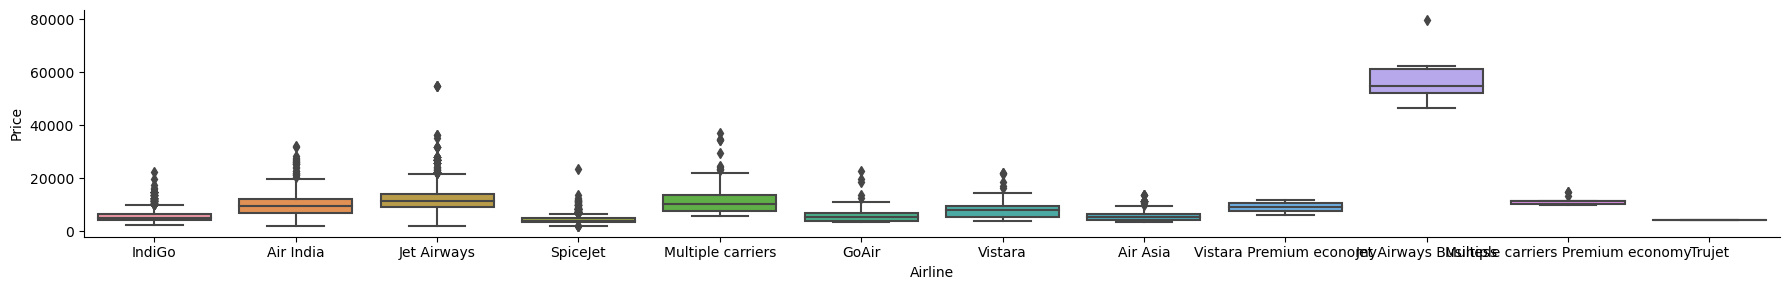

In [22]:
sns.catplot(y = "Price", x = "Airline", data = df_train, kind="box", height = 3, aspect = 6)
plt.show()

**Inference:** Jet Airways has the most outliers in terms of price.
- From the plot below we can infer that Jet Airways business is the costliest airways.

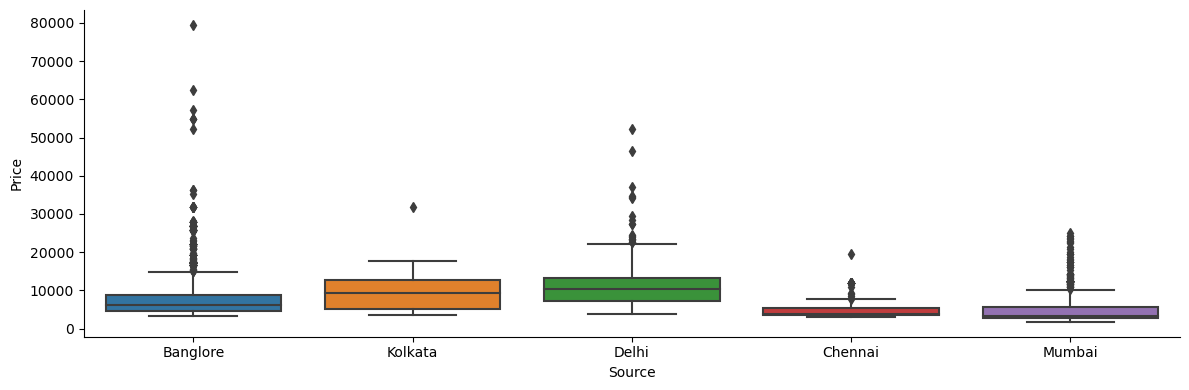

In [23]:
sns.catplot(y = "Price", x = "Source", data = df_train, kind="box", height = 4, aspect = 3)
plt.show()

**Inference:** box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Kolkata has the least.
- From above it can infer that for Departing from Banglore we have to pay highest Fare.

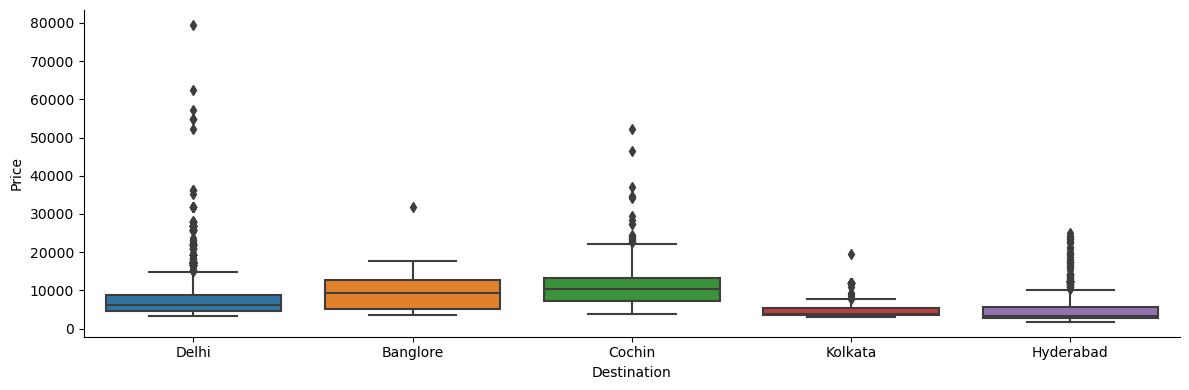

In [24]:
sns.catplot(y = "Price", x = "Destination", data = df_train, kind="box", height = 4, aspect = 3)
plt.show()

**Inference:** box plot between the price of the flight and the destination to which the passenger is travelling and we can see that New Delhi has the most outliers and Banglore has the least.
* From above it can be infer that destination as Delhi, from any Sorces we have to pay high fare.

**Top 5 Aviation Companies whose flight tickets are sold the most?**

In [25]:
df_train['Airline'].value_counts()[:5].reset_index().rename(columns ={'index':'Airline','Airline':'Counts'})

,Airline,Counts
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818


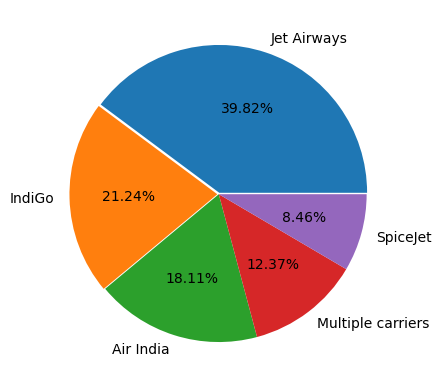

In [26]:
airline_val = df_train['Airline'].value_counts().values
airline_names = df_train['Airline'].value_counts().index
plt.pie(x=airline_val[:5], labels=airline_names[:5], autopct = '%1.2f%%', explode=[0.01, 0.01, 0,0,0])
plt.show()

**Average price of Jet Airways whose flight tickets are sold the most**

In [27]:
df_train[df_train['Airline']=='Jet Airways'].mean().Price

11643.92335671603

* The average  Price for Jet Airways is 11643.92.

####  Top 5  Airlines and their Average Price for Flight Tickets

In [28]:
aviation_comp = df_train.groupby(['Airline']).mean()['Price'].sort_values(ascending=False)[:5].reset_index()
aviation_comp

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11643.923357
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9612.427756


### Top 5 Airlines and their maximum Price for Flight Tickets

In [29]:
airline_price = df_train.groupby(['Airline']).max()['Price'].sort_values(ascending=False)[:5].reset_index()
airline_price

,Airline,Price
0,Jet Airways Business,79512
1,Jet Airways,54826
2,Multiple carriers,36983
3,Air India,31945
4,SpiceJet,23267


In [30]:
airline_price  = df_train.groupby(['Airline']).max()['Price']

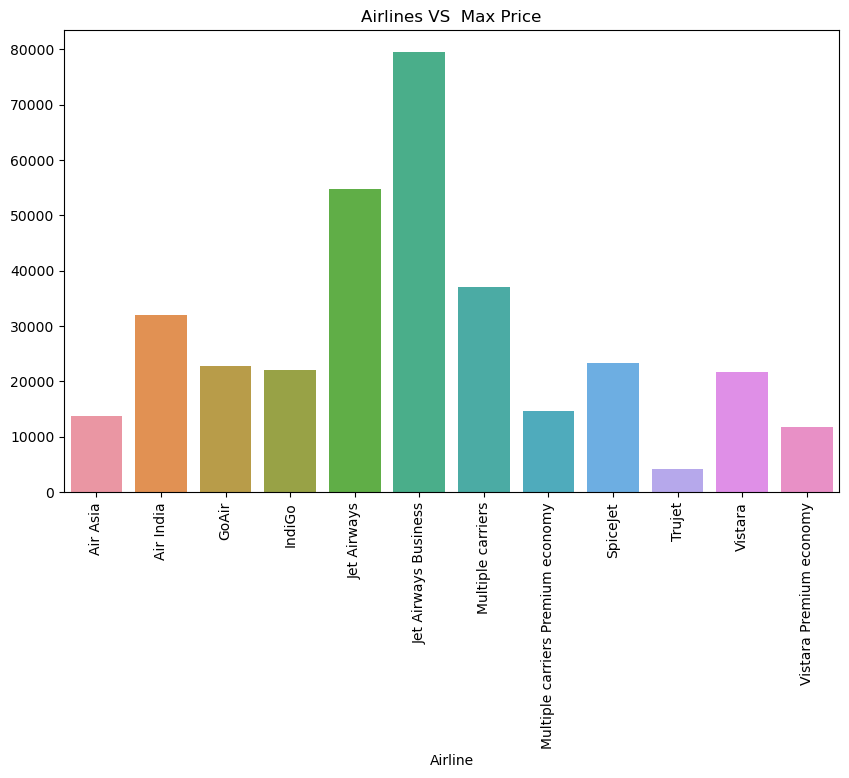

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=airline_price.index, y= airline_price.values)
plt.title('Airlines VS  Max Price')
plt.xticks(rotation=90)
plt.show() 

**Observations:**
* Costliest Flight Tickets Sold is of Jet Airways Business .
* Second Most Costliest Flight Tickets Sold is of Jet Airways .

### Feature Engineering

**Extracting Date & Month from Date_of_Journey Column**
* Converting into Datetime:
    * We are going to extract the date and month from the date of the journey .
    * For this, we require pandas to_datetime to convert the object data type to DateTime data type .
    * .dt.day the method will extract only the day from the date.
    * .dt.month the method will extract only the month of that date.

In [32]:
# here we will extract date and month from Date of Journey
#day
df_train["journey_Date"]= pd.to_datetime(df_train['Date_of_Journey'], format= "%d/%m/%Y").dt.day
df_test["journey_Date"]= pd.to_datetime(df_test['Date_of_Journey'], format= "%d/%m/%Y").dt.day


#month
df_train["journey_Month"]= pd.to_datetime(df_train['Date_of_Journey'], format= "%d/%m/%Y").dt.month
df_test["journey_Month"]= pd.to_datetime(df_test['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [33]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [34]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [35]:
# Departure time is when a plane leaves the Source.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df_train['Dep_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_test['Dep_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour

#Extracting minutes
df_train['Dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
df_train.drop(['Dep_Time'],axis=1,inplace=True)
df_test.drop(['Dep_Time'],axis=1,inplace=True)

In [36]:
df_train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


* Arrival time is when a plane reaches the destination.
* extracting Hour & Minutes from Arrival Time Column

In [37]:
# Extracting Hours
df_train['Arrival_hour']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_test['Arrival_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour

#Extracting minutes
df_train['Arrival_min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
df_train.drop(['Arrival_Time'],axis=1,inplace=True)
df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [38]:
df_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


**extracting the hours and minutes from the feature “duration”.**

In [39]:
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [40]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

#we will remove the DUrtaion clumns
df_train.drop(['Duration'],axis=1,inplace=True)

In [41]:
# Assigning and converting Duration column into list
duration = list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [42]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

#we will remove the DUrtaion clumns
df_test.drop(['Duration'],axis=1,inplace=True)

In [43]:
df_train.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [44]:
df_train['Additional_Info'].value_counts(normalize=True)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [45]:
# droping column, since about 78% Airlines don.t have Additional Info Details.
# Route---> Route is related to 'no of stops'
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df_test.drop(['Route',"Additional_Info"], axis=1, inplace=True)

In [46]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


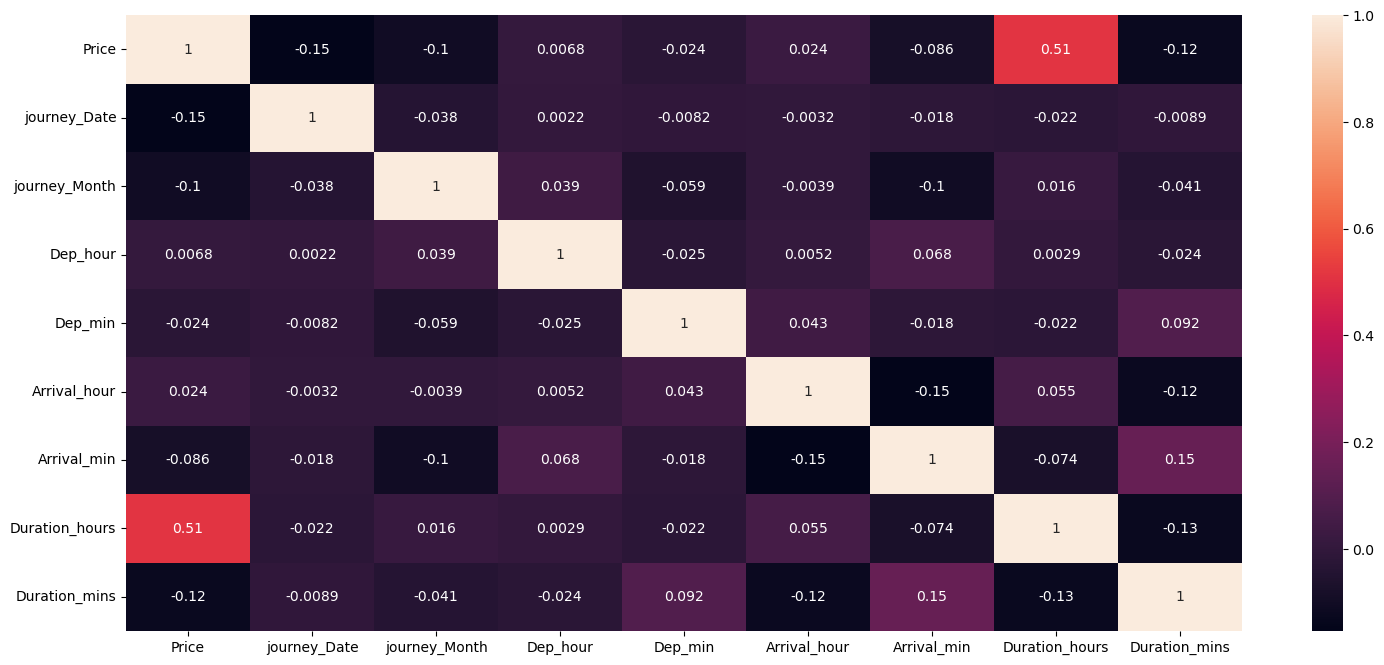

In [47]:
plt.figure(figsize=(18,8))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

**Total_Stops Variable:**
* Non-stop refers to a flight with no stops, i.e. a straight flight.It is self-evident that other values have the same meaning. We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.

In [48]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
df_test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [50]:
df_train['Total_Stops'] = df_train['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [51]:
print(df_train.shape, df_test.shape)

(10682, 13) (2671, 12)


In [52]:
df_train['Total_Stops'].value_counts(normalize=True)*100

1    52.658678
0    32.681146
2    14.229545
3     0.421269
4     0.009362
Name: Total_Stops, dtype: float64

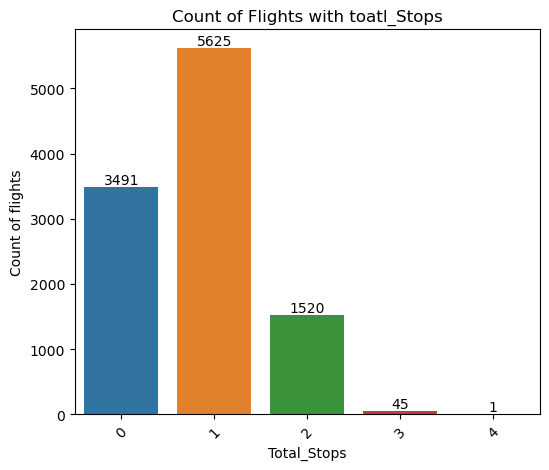

In [53]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = df_train['Total_Stops'], data =df_train)
plt.xlabel('Total_Stops')
plt.ylabel('Count of flights')
plt.title('Count of Flights with toatl_Stops')
plt.xticks(rotation = 45)
for label in ax.containers:
    ax.bar_label(label)

plt.show()

- From above we can see that about 52% of Flights have 1 stop, 32% Flights have 0 Stops and very least no of Flights have 3 and 4 stops b/w source and Destination.

In [54]:
totalStop_price  = df_train.groupby(['Total_Stops']).mean()['Price']

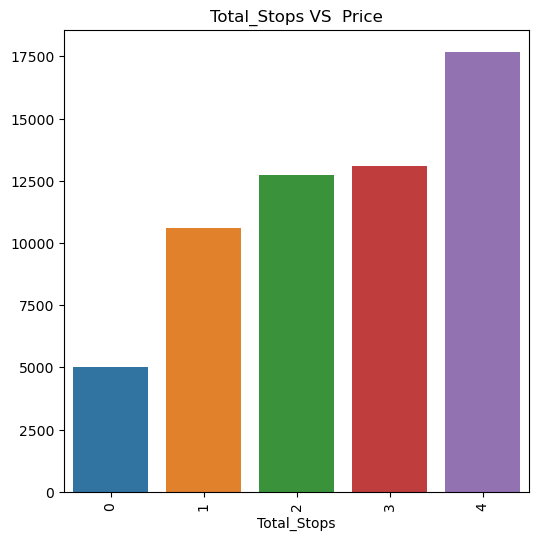

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x= totalStop_price.index, y= totalStop_price.values)
plt.title('Total_Stops VS  Price')
plt.xticks(rotation=90)
plt.show()

- From above we can infer that Filght fare is more for the flights having more no of stops b/w source and Destination.

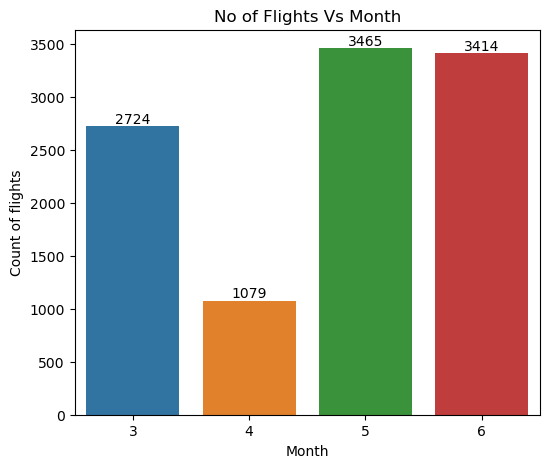

In [56]:
plt.figure(figsize = (6, 5))
ax=sns.countplot(x = 'journey_Month', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.title('No of Flights Vs Month')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- From above we can see that the more Flights are booked in Month of May

In [57]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [58]:
train_df = pd.get_dummies(df_train, drop_first=True)
test_df = pd.get_dummies(df_test, drop_first = True)

In [59]:
print(train_df.shape, test_df.shape)

(10682, 29) (2671, 28)


**Spliting the data into features and labels**

**X & y**

In [60]:
X = train_df.drop('Price', axis=1)
y = train_df['Price']

In [61]:
print(X.shape, y.shape)

(10682, 28) (10682,)


In [62]:
X.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


### Feature Selection

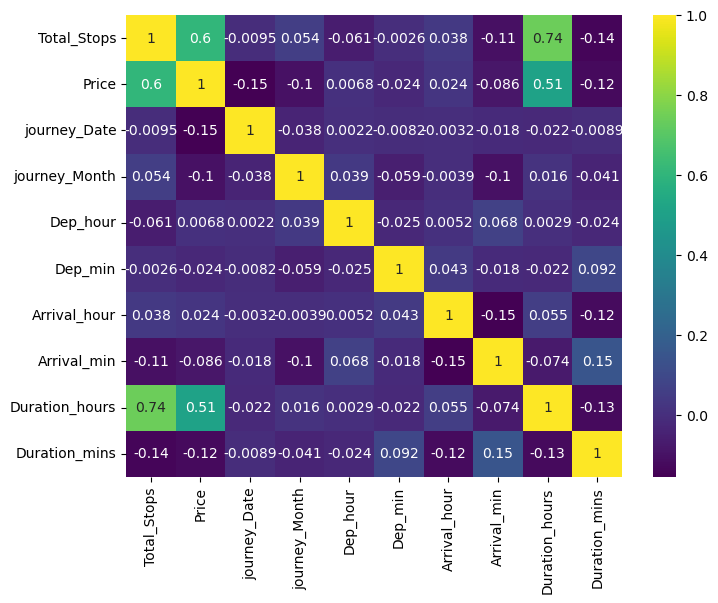

In [63]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap= 'viridis')
plt.show()

- from above, We can see that Total_stops is highly correlated with Duration_hours which is very obvious. If the no. of stops would increase, the duration hours of the flight will also increase.
- Also, price is highly correlated with total stops because if stops would increase that would also require a high quantity of fuel, and that would increase the price.


In [64]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[2.39138011e-01 1.42408149e-01 5.85479172e-02 2.41544858e-02
 2.11805651e-02 2.73184676e-02 2.00568150e-02 1.19931394e-01
 1.84451764e-02 8.75954035e-03 1.86567800e-03 1.86330394e-02
 1.41100254e-01 6.74295613e-02 1.92179955e-02 8.83394485e-04
 5.33101954e-03 1.00354316e-04 4.56652664e-03 6.86407795e-05
 6.89819164e-04 1.05134211e-02 4.84482363e-03 6.84028298e-03
 9.60499354e-03 1.76848316e-02 1.00326135e-02 6.52229175e-04]


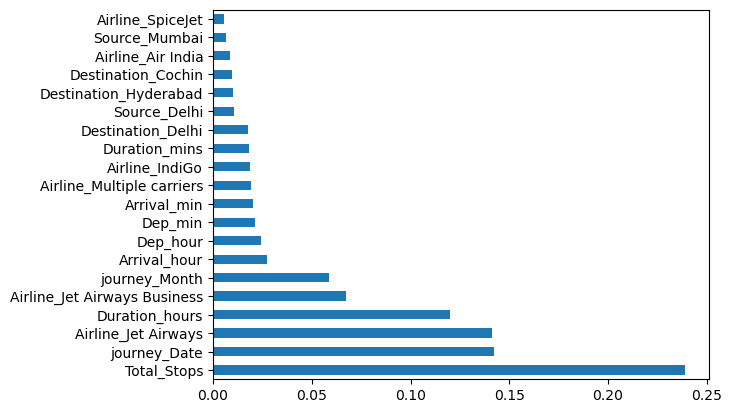

In [65]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

- From above we can see that, Total_stops is the feature with the highest feature importance in deciding the Price as we have also seen above.
- After that Journey Day also plays a big role in deciding the Price. Prices are generally higher on weekends.

In [66]:
# Using GridSearchCV to find the best Algorithm for this Problem.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [67]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'linear_regression':{'model':LinearRegression(), 'parameters':{'normalize':[True, False]}},
             
              'lasso':{'model':Lasso(), 'parameters':{'alpha':[1,2],'selection':['random','cyclic']}},
              
              'elastic_net':{'model':ElasticNet(),'parameters':{'alpha':[0.1,0.2,1,2,3,5,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}},
             
             'decision_tree':{'model':DecisionTreeRegressor(random_state=0), 'parameters':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
             
             'random_forest':{'model':RandomForestRegressor(random_state=0), 'parameters':{'n_estimators':[5,10,15,20],'criterion':['mse','friedman_mse']}},
             'xgb_reg':{'model':XGBRegressor(), 'parameters':{'n_estimators': [20,50,100],'learning_rate': [0.05,0.1,0.5]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},0.607377
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.607211
2,elastic_net,"{'alpha': 0.1, 'l1_ratio': 1}",0.607382
3,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.694289
4,random_forest,"{'criterion': 'friedman_mse', 'n_estimators': 20}",0.808560
5,xgb_reg,"{'learning_rate': 0.5, 'n_estimators': 50}",0.836014


**Since the XGBRegressor algorithm has the highest accuracy, the model selected for this problem is RandomForestRegressor**

In [68]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(max_depth=5,learning_rate= 0.5, n_estimators=50), X,y, cv=5)
print('Cross Validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross Validation Score:83%


**Train_Test Split**

In [69]:
#Splitting the dataset into train and test samples.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape, X_test.shape)

(8545, 28) (2137, 28)


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# Creating RandomForestRegressor Model
model = XGBRegressor(max_depth=5,learning_rate= 0.5, n_estimators=50)
model.fit(X_train, y_train)

#prediction on X_train, X_test
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Score
print('Train R2-Score:', model.score(X_train, y_train))
print('Test R2-Score:', model.score(X_test, y_test))

Train R2-Score: 0.8969279126763562
Test R2-Score: 0.8461770476309851


**Fitting parametric distributions**

- We will use distplot()to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data. it should be a closed Gaussian distributed graph and the difference between ‘y_test’(real value)and ypred_test(predictions) should also be minimal.Here most of the residuals are 0, which means our model is generalizing well.

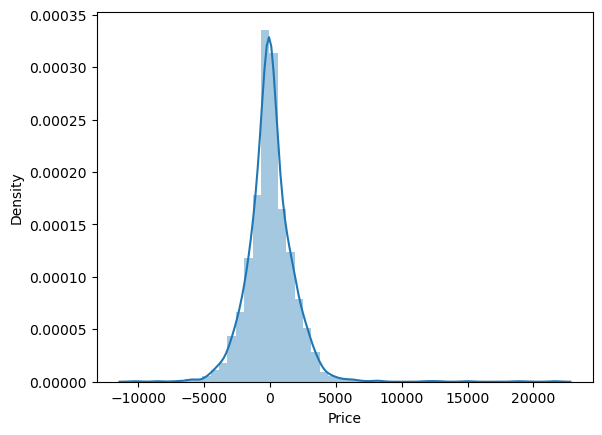

In [72]:
sns.distplot(y_test-ypred_test)
plt.show()

**Plotting y_test vs predictions**

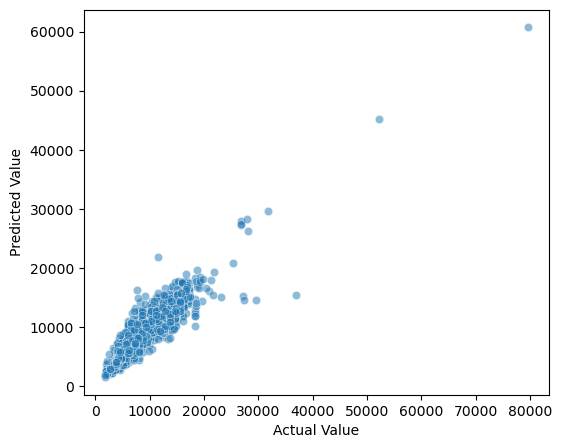

In [73]:
plt.figure(figsize=(6,5))
sns.scatterplot(y_test, ypred_test, alpha=0.5)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE:', mean_absolute_error(y_test, ypred_test))
print('MSE:', mean_squared_error(y_test, ypred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, ypred_test)))

MAE: 1228.3720254715101
MSE: 3353761.1517404225
RMSE: 1831.3277018983856


### saving the Model

In [80]:
import pickle
#create a file, where we want to save the model
file = open('flight_xgb1.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)

In [81]:
xgb1_model = open('flight_xgb1.pkl','rb')
model = pickle.load(xgb1_model)

### Predicting the test_dataset using our Trained model

In [82]:
df_test.shape

(2671, 12)

In [83]:
test_pred = model.predict(test_df)

In [84]:
test_pred

array([12818.776, 11139.38 , 12751.317, ..., 12818.776, 13264.398,
       10364.118], dtype=float32)